## PART 4: Main Func: with Modifier.py
Error: the NaN values for X show up when Modifier can't generate (given the interval) new values.

[*MAIN*]: Main loop started with parameters:  {'domain_min_range': 1, 'domain_max_range': 100, 'modifier_incremental_unit': 3, 'modifier_data_point': 4}
[*MAIN*]: Main loop started with settings:  {'do_plot': False, 'extensive_search': True, 'extensive_iteration': False} 

[MODC]: *** Entering Modifier controller ***
[MODC]: intervals list:  [(1, 100)]
[MOD]: iteration:  0 , interval:  1 - 100

Simulator...
  * Sim_y shape:    (25,)


 Modx:  [1.0, 1.2525510204081631, 1.8418367346938775, 2.767857142857143, 4.030612244897959, 5.630102040816326, 7.566326530612245, 9.839285714285714, 12.448979591836734, 15.395408163265307, 18.678571428571427, 22.2984693877551, 26.255102040816325, 30.5484693877551, 35.17857142857143, 40.14540816326531, 45.44897959183673, 51.089285714285715, 57.066326530612244, 63.380102040816325, 70.03061224489795, 77.01785714285714, 84.34183673469387, 92.00255102040816, 100.0] 
symx:  [-2.6600643148294876, -10.456305825755676, -5.769684816193886, 5.04545147629716, 4.80755

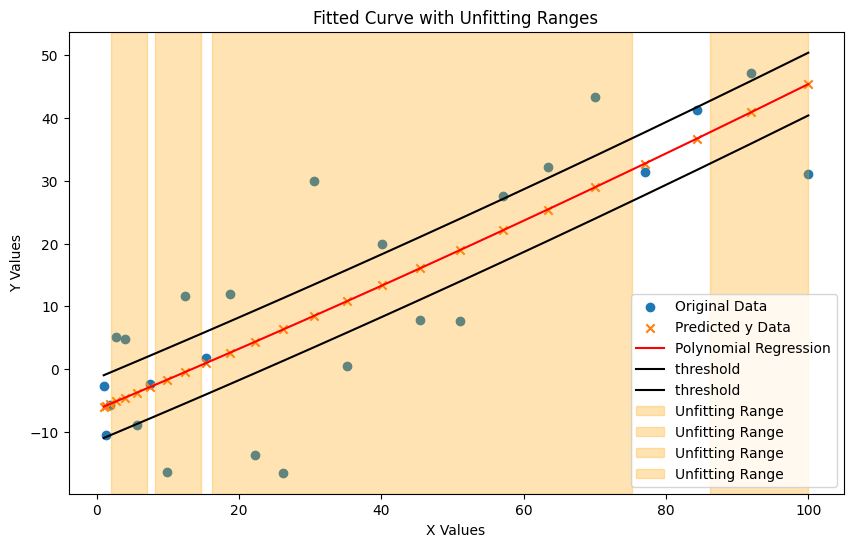

       *** OUTPUT unfitting_ranges [[2.073341836734694, 7.082270408163265], [8.134566326530612, 14.658801020408163], [16.216198979591837, 75.27104591836735], [86.25701530612244, 100.0]] 

       *** OUTPUT validator_ranges [[2.073341836734694, 7.082270408163265], [8.134566326530612, 14.658801020408163], [16.216198979591837, 75.27104591836735], [86.25701530612244, 100.0]] 

[MODC]: *** Entering Modifier controller ***
[MODC]: intervals list:  [[2.073341836734694, 7.082270408163265], [8.134566326530612, 14.658801020408163], [16.216198979591837, 75.27104591836735], [86.25701530612244, 100.0]]
[MOD]: iteration:  0 , interval:  2.073341836734694 - 7.082270408163265
[MOD]: iteration:  1 , interval:  8.134566326530612 - 14.658801020408163
[MOD]: iteration:  2 , interval:  16.216198979591837 - 75.27104591836735
[MOD]: iteration:  3 , interval:  86.25701530612244 - 100.0

Simulator...
  * Sim_y shape:    (87,)


 Modx:  [2.073341836734694, 2.6370296567239366, 3.4197664238614145, 4.4215521381471

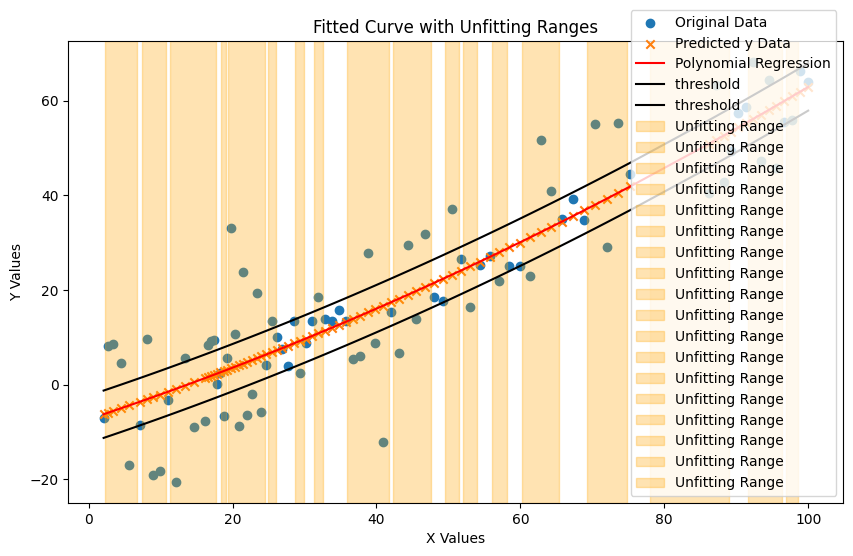

       *** OUTPUT unfitting_ranges [[2.2142637917320047, 6.722299506017719], [7.345344387755102, 10.697589573195392], [11.241275797685187, 17.70361266185887], [18.383966368318447, 19.11358251721231], [19.367735109606773, 24.525790701695502], [24.878468178958535, 25.969342239037168], [28.706291210909523, 29.961373412435776], [31.265718056396313, 32.61932514279113], [35.96931784273461, 41.77547895228009], [42.33615340871011, 47.62853572875174], [49.49118805363419, 51.40310282095092], [52.05135495281968, 54.02895297671546], [56.05581344304553, 58.131936351809884], [60.25732170300853, 65.40813035416093], [69.25148753214597, 74.86207897935171], [78.01753826530611, 89.00462699951488], [91.5762773563711, 96.38475091262144], [96.93327201521348, 98.59593083859998]] 

       *** OUTPUT validator_ranges [[2.2142637917320047, 6.722299506017719], [7.345344387755102, 10.697589573195392], [11.241275797685187, 17.70361266185887], [18.383966368318447, 19.11358251721231], [19.367735109606773, 24.5257907

In [3]:
# IMPORT LIBRARIES
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import HuberRegressor
from sklearn.preprocessing import StandardScaler
from itertools import compress

# import global parameters 
# TODO: make interface (widget) to load/change the parameters (low-priority)
from global_settings import threshold_x_interval,threshold_y_fitting, mdv
from global_settings import mdv,simexSettings

#import classes for Modifier, Simulator, and Validator,
from Validator import Validator
from Modifier import Modifier
from Simulator import Simulator
from Logger import Logger

validator = Validator
modifier = Modifier
simulator = Simulator
logger = Logger()

mainfunc=True
# Initialize interval list
interval_lists=[(mdv["domain_min_range"], mdv["domain_max_range"])]
print('[*MAIN*]: Main loop started with parameters: ',mdv)
print('[*MAIN*]: Main loop started with settings: ',simexSettings,'\n')

while mainfunc==True:
    
    # Calls Modifier Controller
    mod_x_list= modifier.modifier_controller(ranges_list=interval_lists,local_modifier=modifier.local_modifier_A, do_plot=simexSettings["do_plot"])

    # breaks loop if iterations end by granularity reached
    if mod_x_list == False: # FALSE IF ["modifier_data_point"] < mdv["modifier_incremental_unit"]:
        print('[*MAIN*]: --   ITERATIONS END HERE  --')
        break
    
    # Calls Simulator
    mod_x,sim_y_list = simulator.simulator_controller(mod_x_list,selected_function=simulator.sim_func_B)
    assert len(mod_x) == len(sim_y_list)
    
    # print to see outputs from Mod and Sim controllers
    temp_log = "LEN OF MODX-SIMY: ",str(len(mod_x))," symx: ",str(len(sim_y_list))
    logger.log_main(temp_log)
    print('\n\n Modx: ',mod_x,'\nsymx: ',sim_y_list)
    
    # Calls Validator controller
    ranges = validator.validator_controller(mod_x_list=np.array(mod_x),sim_y_list=np.array(sim_y_list))
    
    # Updates interval_list to new range output from validator controller
    interval_lists = ranges


# TODO: make a list of history variable that are needed in validator: i-e- number of points total, number of good points, etc. 